# Practical 3: Dataset Joining and Access-Assess-Address Framework

### Radzim Sendyka

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2025-09-08

**Abstract**: In this lab session we will explore dataset joining
techniques, implement the Access-Assess-Address framework in practice,
work with the DSAIL Porini camera trap data, and build predictive models
for animal sightings.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## Code Reuse with Fynesse

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-code-reuse-fynesse.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-code-reuse-fynesse.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

{We will be reusing some of the functions we created in the first
practical. This demonstrates one of the key principles of data science:
building reusable code libraries that can be applied across multiple
projects.

In [1]:
%%capture
%pip install osmnx
import sys

### Exercise 1

Install your Fyness library, and run code to show its available.

In [2]:
# Delete repo
!rm -rf fynesse_template

In [3]:
# Write your answer to Exercise 1 here


!git clone https://github.com/jamesmuiru/fynesse_template.git
%cd fynesse_mlfc
sys.path.insert(0, '/content/fynesse_template')
sys.path.insert(0, '/content/fynesse_template/fynesse')
print("imemaliza")



Cloning into 'fynesse_template'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 242 (delta 11), reused 6 (delta 6), pack-reused 219 (from 2)
Receiving objects: 100% (242/242), 156.78 KiB | 4.75 MiB/s, done.
Resolving deltas: 100% (105/105), done.
[Errno 2] No such file or directory: 'fynesse_mlfc'
/content
imemaliza


In [4]:
import fynesse

import sys
sys.path.append('/content/fynesse_mlfc/fynesse')



# ACCSS:
print(" Setting up data access")
nyeri_data = fynesse.access.DataAccess("Nyeri, Kenya", -0.4371, 36.9580)

# Get all the data
nyeri_data.access_all_data()
print(f"Data accessed for {nyeri_data.place_name}")

# ASSESS: Analyze the data
assessor = fynesse.assess.DataAssessment(nyeri_data)
poi_analysis = assessor.assess_poi_distribution()
print("POI analysis complete")

# ADDRESS: Create visualization
addresser = DataSolution(nyeri_data)
addresser.address_visualization(figsize=(10,8))


 Setting up data access
Retrieved 49183 POIs
Data accessed for Nyeri, Kenya
POI Assessment Summary:
                    POI Type  Count
0                   building  48940
1                    amenity    176
2             amenity:school     29
3           amenity:hospital      9
4         amenity:restaurant     16
5               amenity:cafe      3
6                       shop     14
7                    tourism     53
8              tourism:hotel     17
9             tourism:museum      1
10                   leisure     29
11              leisure:park      6
12                  historic      6
13  amenity:place_of_worship     18
POI analysis complete


NameError: name 'DataSolution' is not defined

## DSAIL-Porini Dataset

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Head over to https://data.mendeley.com/datasets/6mhrhn7rxc/6 to explore
the DSAIL-Porini dataset. This dataset contains camera trap images and
annotations from Kenya, providing rich information about wildlife
patterns and behavior.

Locate the `camera_trap_dataset_annotation.xlsx` file and make it
available in this notebook.

In [5]:
import os
import requests
import pandas as pd

In [6]:
def download_if_not_exists(url, filepath):
    """Download file if it doesn't exist locally"""
    if os.path.exists(filepath):
        print(f"File already exists: {filepath}")
    else:
        print(f"Downloading: {url}")
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(filepath, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Downloaded to: {filepath}")
    return filepath

In [7]:
# Download the DSAIL-Porini dataset
porini_file = download_if_not_exists(
    'https://data.mendeley.com/public-files/datasets/6mhrhn7rxc/files/641e83c9-16a3-485c-b247-b5701f8a5540/file_downloaded',
    'camera_trap_dataset_annotation.xlsx'
)

Downloading: https://data.mendeley.com/public-files/datasets/6mhrhn7rxc/files/641e83c9-16a3-485c-b247-b5701f8a5540/file_downloaded
Downloaded to: camera_trap_dataset_annotation.xlsx


In [8]:
porini_df = pd.read_excel(porini_file)
porini_df.head()

,Filename,Device,Species,Count,Sex,Latitude,Longitude
0,2021-08-01-07-31-10.jpg,Raspberry Pi 2,IMPALA,4,"MALE,FEMALE,FEMALE,FEMALE",-0.390386,36.962348
1,2021-08-01-07-31-13.jpg,Raspberry Pi 2,IMPALA,2,"MALE,FEMALE",-0.390386,36.962348
2,2021-08-01-07-31-35.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
3,2021-08-01-07-31-41.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
4,2021-08-01-07-31-45.jpg,Raspberry Pi 2,IMPALA,1,FEMALE,-0.390386,36.962348


## Joining Datasets

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-joining.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-joining.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Exercise 2

Geospatial data is particularly useful because it is the most common
index in the world, over which so many datasets can be joined. Find the
coordiante information in the dataset, and plot it on top of an OSM map.

You may want to deduplicate the coordinates before you plot!

In [9]:
# Geospatial Analysis: Plot Camera Trap Coordinates on OpenStreetMap
import pandas as pd
import folium
import numpy as np

# Load the dataset (assuming it's already downloaded as 'camera_trap_dataset_annotation.xlsx')
df = pd.read_excel('camera_trap_dataset_annotation.xlsx')

# Find coordinate columns automatically
lat_col = lon_col = None
for col in df.columns:
    col_lower = col.lower()
    if 'lat' in col_lower:
        lat_col = col
    elif 'lon' in col_lower:
        lon_col = col

print(f"Found coordinates: {lat_col}, {lon_col}")
print(f"Dataset shape: {df.shape}")

# Extract coordinates and remove missing values
coords_df = df[[lat_col, lon_col]].dropna()

# Deduplicate coordinates
unique_coords = coords_df.drop_duplicates()
print(f"Unique locations: {len(unique_coords)} (from {len(coords_df)} total observations)")

# Create map centered on data
center_lat = unique_coords[lat_col].mean()
center_lon = unique_coords[lon_col].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles='OpenStreetMap')

# Add markers for each unique coordinate
for _, row in unique_coords.iterrows():
    folium.CircleMarker(
        location=[row[lat_col], row[lon_col]],
        radius=8,
        popup=f"Lat: {row[lat_col]:.6f}<br>Lon: {row[lon_col]:.6f}",
        color='red',
        fillColor='red',
        fillOpacity=0.6
    ).add_to(m)

# Fit map to show all points
if len(unique_coords) > 1:
    sw = [unique_coords[lat_col].min(), unique_coords[lon_col].min()]
    ne = [unique_coords[lat_col].max(), unique_coords[lon_col].max()]
    m.fit_bounds([sw, ne])

# Display map
m





Found coordinates: Latitude, Longitude
Dataset shape: (8524, 7)
Unique locations: 18 (from 8524 total observations)


<!-- Dsail Porini Address -->

## Sighting Predictions

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-preprocessing.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-preprocessing.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We will use the dataset to create a simple prediction model for the
likelihood of animal sightings.

Let’s follow a minimal example of the Access-Assess-Address framework!

Reminder about Neil’s article on the framework
[here](https://inverseprobability.com/talks/notes/access-assess-address-a-pipeline-for-automated-data-science.html).

### Access

Access is already done, partly years ago by the DSAIL team, and two
cells above by us. Example tasks within access would be:

-   Setting up the cameras in the woods (done)
-   Collecting the pictures (done)
-   Labeling the dataset (done)
-   Making the excel file online accessible (done)
-   Downloading the file (done just now)}

In [10]:
porini_df.head()

,Filename,Device,Species,Count,Sex,Latitude,Longitude
0,2021-08-01-07-31-10.jpg,Raspberry Pi 2,IMPALA,4,"MALE,FEMALE,FEMALE,FEMALE",-0.390386,36.962348
1,2021-08-01-07-31-13.jpg,Raspberry Pi 2,IMPALA,2,"MALE,FEMALE",-0.390386,36.962348
2,2021-08-01-07-31-35.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
3,2021-08-01-07-31-41.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
4,2021-08-01-07-31-45.jpg,Raspberry Pi 2,IMPALA,1,FEMALE,-0.390386,36.962348


### Assess

Have a look at the dataset for any issues that could stop us from being
able to cleanly analyse it.

Some issues:

-   Timestamps not readilly available. Hidden in image filenames.
-   No timestamps available for one of the cameras.
-   No Camera ID, but can be deduced from coordinates.

Decide how it would be best to address these and potentially other
issues with the data.

We would like an output dataframe that has a column for counts each
animal was spotted by each camera, and rows for each day in the
available range. You might want to use this opportunity to practice
[Pandas
MultiIndex](https://pandas.pydata.org/docs/user_guide/advanced.html).

In [11]:
import pandas as pd
import numpy as np
import re

In [12]:
# Copy original
df = porini_df.copy()

# Normalize species and parse counts
df["Species"] = df["Species"].astype(str).str.strip()

# Extract timestamp from filename
pat = re.compile(r"(\d{4})-(\d{2})-(\d{2})-(\d{2})-(\d{2})-(\d{2})")
def parse_ts(name):
    m = pat.search(str(name))
    if not m:
        return pd.NaT
    y, M, d, h, m_, s = map(int, m.groups())
    return pd.Timestamp(y, M, d, h, m_, s)

df["timestamp"] = df["Filename"].map(parse_ts)
df["date"] = df["timestamp"].dt.date

# Camera ID from rounded lat/lon
df["Latitude"] = df["Latitude"].round(4)
df["Longitude"] = df["Longitude"].round(4)
coord_key = df["Latitude"].astype(str) + "," + df["Longitude"].astype(str)
codes, _ = pd.factorize(coord_key)
df["camera_id"] = pd.Series(codes).map(lambda i: f"C{int(i)+1:03d}")

# Extract camera coordinates dictionary (rounded)
camera_coords = (
    df.drop_duplicates(subset="camera_id")[["camera_id", "Latitude", "Longitude"]]
      .set_index("camera_id")
      .sort_index()
      .apply(tuple, axis=1)
      .to_dict()
)

# Group and count: number of pictures per species per camera per day
daily = (
    df.dropna(subset=["date"])
      .groupby(["date", "camera_id", "Species"])
      .size()
      .reset_index(name="photo_count")
      .pivot_table(index="date", columns=["camera_id", "Species"], values="photo_count", aggfunc="sum")
      .fillna(0)
      .astype(int)
      .sort_index()
)

# Fill missing dates
if not daily.empty:
    full_idx = pd.date_range(start=daily.index.min(), end=daily.index.max(), freq="D").date
    daily = daily.reindex(full_idx).fillna(0).astype(int)
    daily.index.name = "date"

print(camera_coords)
daily.tail()

{'C001': (-0.3904, 36.9623), 'C002': (-0.3886, 36.9614), 'C003': (-0.3866, 36.9654), 'C004': (-0.3864, 36.9642), 'C005': (-0.3908, 36.9625), 'C006': (-0.3913, 36.9622), 'C007': (-0.3904, 36.9621), 'C008': (-0.3904, 36.9624), 'C009': (-0.39, 36.9621), 'C010': (-0.3902, 36.962), 'C011': (-0.3868, 36.966), 'C012': (-0.3904, 36.9625), 'C013': (-0.3908, 36.9626), 'C014': (-0.3864, 36.9641)}


camera_id      C001                                                       \
Species    BUSHBUCK IMPALA IMPALA, MONKEY MONKEY WARTHOG WATERBUCK ZEBRA   
date                                                                       
2021-12-22        0      0              0      0       0         0     0   
2021-12-23        0      0              0      0       0         0     0   
2021-12-24        0      0              0      0       0         0     0   
2021-12-25        0      0              0      0       0         0     0   
2021-12-26        0      0              0      0       0         0     0   

camera_id      C002                    ...     C011   C012                  \
Species    BUSHBUCK CAN'T TELL IMPALA  ... BUSHBUCK IMPALA IMPALA, WARTHOG   
date                                   ...                                   
2021-12-22        0          0      0  ...        0      0               0   
2021-12-23        0          0      0  ...        0      0               0   
2021-12-24        0          0      0  ...        0      0               0   
2021-12-25        0          0      0  ...        0      0               0   
2021-12-26        0          0      0  ...        0      0               0   

camera_id        C013                                              C014  \
Species    CAN'T TELL IMPALA IMPALA, ZEBRA ZEBRA ZEBRA, IMPALA BUSHBUCK   
date                                                                      
2021-12-22          0      0             0     0             0        0   
2021-12-23          0    747           150    40            20      245   
2021-12-24        129   1577             0     0             0        0   
2021-12-25          0     22             0     0             0        0   
2021-12-26          0      5             0     0             0        0   

camera_id             
Species    WATERBUCK  
date                  
2021-12-22         0  
2021-12-23       330  
2021-12-24         0  
2021-12-25         0  
2021-12-26         0  

[5 rows x 54 columns]

Huh, looks like we have some more issues.

-   “Impala, Monkey” is not a species - should be counted towards two!
-   “Can’t Tell” shouldn’t be a species at all.
-   Some columns don’t exist (eg. `C011` has no `ZEBRA`). Let’s just
    fill them with zeros.

Additionally, there probably weren’t `1577` impalas spotted on Christmas
Eve 2021. This is a result of burst shots repetitively capturing the
same animal. For now, let’s just treat the data as binary, whether at
least one photo was taken on that day.

### Exercise 3

Use the cell below to implement the changes discussed above, and
potentially additional issues.

In [13]:
# Write your answer to Exercise 3 here


daily_bin = daily.copy()
# Step 1: Flatten the multi-index and reshape the dataframe

# This step is not needed as we can iterate through the columns directly

# Step 2: Create a new clean dataframe
binary_rows = []

for (cam, species_str), series in daily_bin.items():
    # Split species (e.g. "IMPALA, MONKEY") into a list of individual species
    # ignore the "CAN'T TELL" species
    species_list = [s.strip() for s in species_str.split(',') if s.strip() != "CAN'T TELL"]

    for species in species_list:

      col = pd.Series(series, index=series.index)
      # Convert every value to 1 if any sightings, otherwise 0
      col_bin = (col > 0).astype(int)
      binary_rows.append((cam, species, col_bin))

# Step 3: Rebuild dataframe as binary_df

binary_df = pd.DataFrame({
    (cam, species): values
    for cam, species, values in binary_rows
}, index=daily_bin.index)

# Step 4: Create MultiIndex and
binary_df.columns = pd.MultiIndex.from_tuples(binary_df.columns)
binary_df = binary_df.sort_index(axis=1, level=[0, 1])

# Step 5: Ensure all possible (camera, species) pairs exist

# Get all unique cameras and species used across all rows and store as a list
all_cameras = binary_df.columns.get_level_values(0).unique().tolist()
all_species = binary_df.columns.get_level_values(1).unique().tolist()

# Build full column MultiIndex
full_columns = pd.MultiIndex.from_product([all_cameras, all_species], names=["camera_id", "Species"])

# Reindex to include all possible combinations, fill missing with 0
binary_df = binary_df.reindex(columns=full_columns, fill_value=0)

binary_df.tail()

camera_id      C001                                           C002         \
Species    BUSHBUCK IMPALA MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA   
date                                                                        
2021-12-22        0      0      0       0         0     0        0      0   
2021-12-23        0      0      0       0         0     0        0      0   
2021-12-24        0      0      0       0         0     0        0      0   
2021-12-25        0      0      0       0         0     0        0      0   
2021-12-26        0      0      0       0         0     0        0      0   

camera_id                  ...   C013                             C014         \
Species    MONKEY WARTHOG  ... MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA   
date                       ...                                                  
2021-12-22      0       0  ...      0       0         0     0        0      0   
2021-12-23      0       0  ...      0       0         0     1        1      0   
2021-12-24      0       0  ...      0       0         0     0        0      0   
2021-12-25      0       0  ...      0       0         0     0        0      0   
2021-12-26      0       0  ...      0       0         0     0        0      0   

camera_id                                  
Species    MONKEY WARTHOG WATERBUCK ZEBRA  
date                                       
2021-12-22      0       0         0     0  
2021-12-23      0       0         1     0  
2021-12-24      0       0         0     0  
2021-12-25      0       0         0     0  
2021-12-26      0       0         0     0  

[5 rows x 84 columns]

In [14]:
pd.set_option('display.max_columns',None)
binary_df.head()

camera_id      C001                                           C002         \
Species    BUSHBUCK IMPALA MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA   
date                                                                        
2021-06-25        0      0      0       0         0     0        0      1   
2021-06-26        0      0      0       0         0     0        0      0   
2021-06-27        0      0      0       0         0     0        0      0   
2021-06-28        0      0      0       0         0     0        0      0   
2021-06-29        0      0      0       0         0     0        0      0   

camera_id                                     C003                        \
Species    MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA MONKEY WARTHOG   
date                                                                       
2021-06-25      0       1         0     0        0      0      0       0   
2021-06-26      0       0         0     0        0      0      0       0   
2021-06-27      0       0         0     0        0      0      0       0   
2021-06-28      0       0         0     0        0      0      0       0   
2021-06-29      0       0         0     0        0      0      0       0   

camera_id                      C004                                        \
Species    WATERBUCK ZEBRA BUSHBUCK IMPALA MONKEY WARTHOG WATERBUCK ZEBRA   
date                                                                        
2021-06-25         0     0        0      0      0       0         0     0   
2021-06-26         0     0        0      0      0       0         0     0   
2021-06-27         0     0        0      0      0       0         0     0   
2021-06-28         0     0        0      0      0       0         0     0   
2021-06-29         0     0        0      0      0       0         0     0   

camera_id      C005                                           C006         \
Species    BUSHBUCK IMPALA MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA   
date                                                                        
2021-06-25        0      0      0       0         0     0        0      0   
2021-06-26        0      0      0       0         0     0        0      0   
2021-06-27        0      0      0       0         0     0        0      0   
2021-06-28        0      0      0       0         0     0        0      0   
2021-06-29        0      0      0       0         0     0        0      0   

camera_id                                     C007                        \
Species    MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA MONKEY WARTHOG   
date                                                                       
2021-06-25      0       0         0     0        0      0      0       0   
2021-06-26      0       0         0     0        0      0      0       0   
2021-06-27      0       0         0     0        0      0      0       0   
2021-06-28      0       0         0     0        0      0      0       0   
2021-06-29      0       0         0     0        0      0      0       0   

camera_id                      C008                                        \
Species    WATERBUCK ZEBRA BUSHBUCK IMPALA MONKEY WARTHOG WATERBUCK ZEBRA   
date                                                                        
2021-06-25         0     0        0      0      0       0         0     0   
2021-06-26         0     0        0      0      0       0         0     0   
2021-06-27         0     0        0      0      0       0         0     0   
2021-06-28         0     0        0      0      0       0         0     0   
2021-06-29         0     0        0      0      0       0         0     0   

camera_id      C009                                           C010         \
Species    BUSHBUCK IMPALA MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA   
date                                                                        
2021-06-25        0      0      0       0         0     0        0      0   
2021-0

## Statistical Analysis of Sighting Patterns

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-probability-analysis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-probability-analysis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Exercise 4

Now let’s create a simple prediction system for whether a specific
`camera` captured a `species` on a given `date`. Let’s use the whole
dataset, except the prediction target date.

Before we jump into addressing the question, let’s further assess the
data. Calculate and plot average probabilities for dates, species, and
cameras. You may want to implement some smoothing over dates, or group
them into longer ranges.

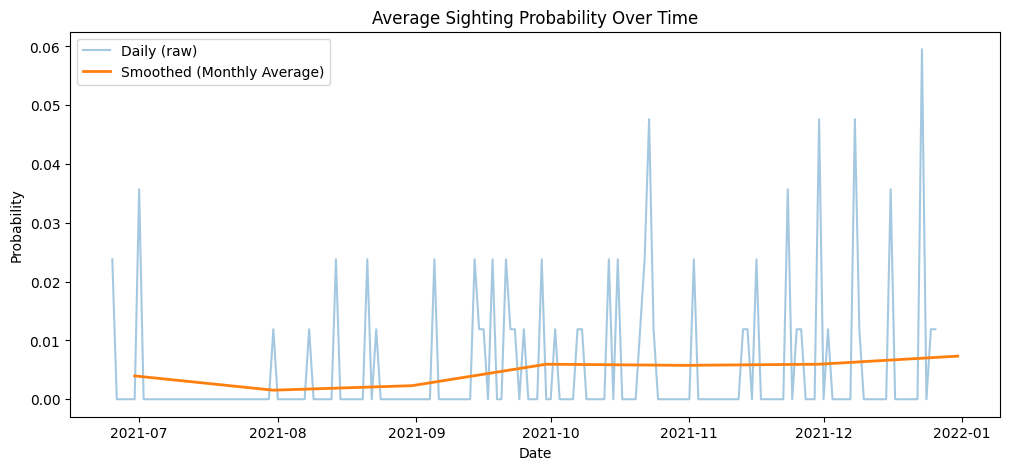

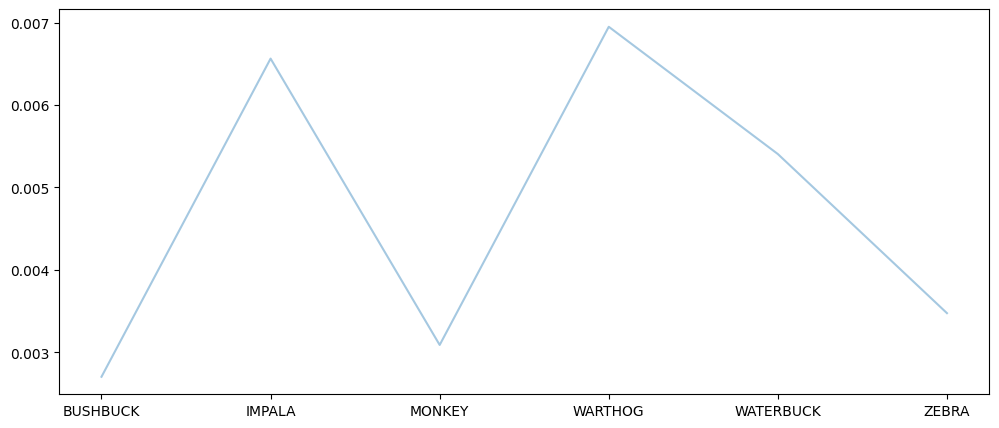

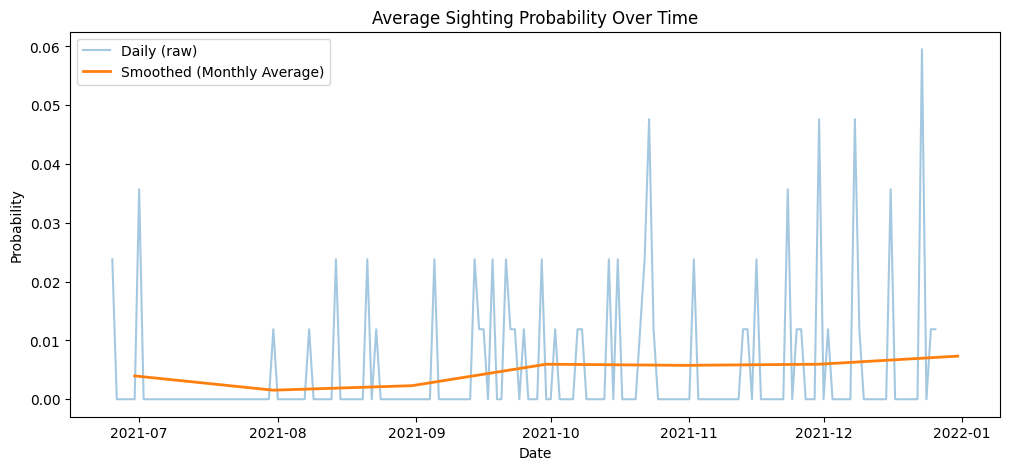

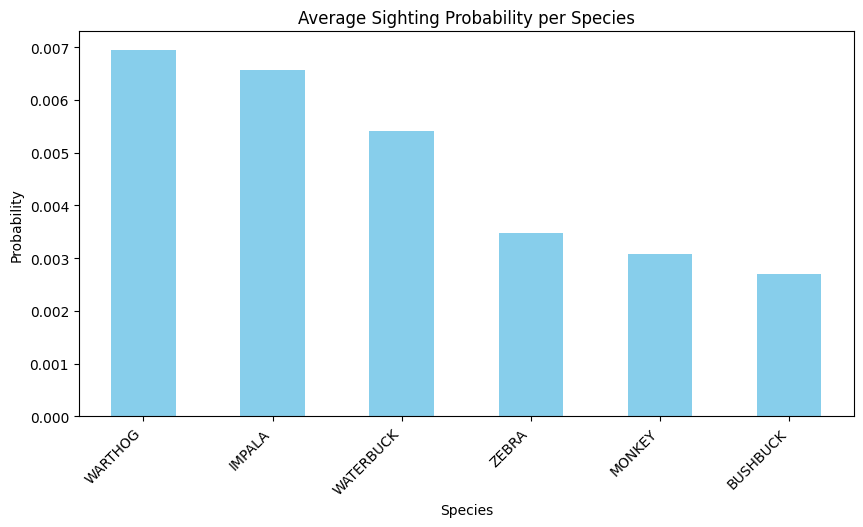

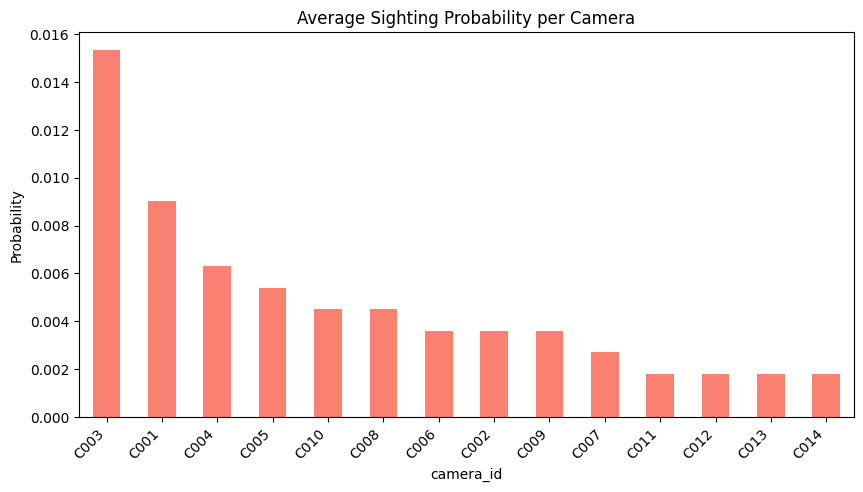

/tmp/ipython-input-1304583912.py:66: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  species_data = binary_df.groupby(level=1, axis=1).mean()


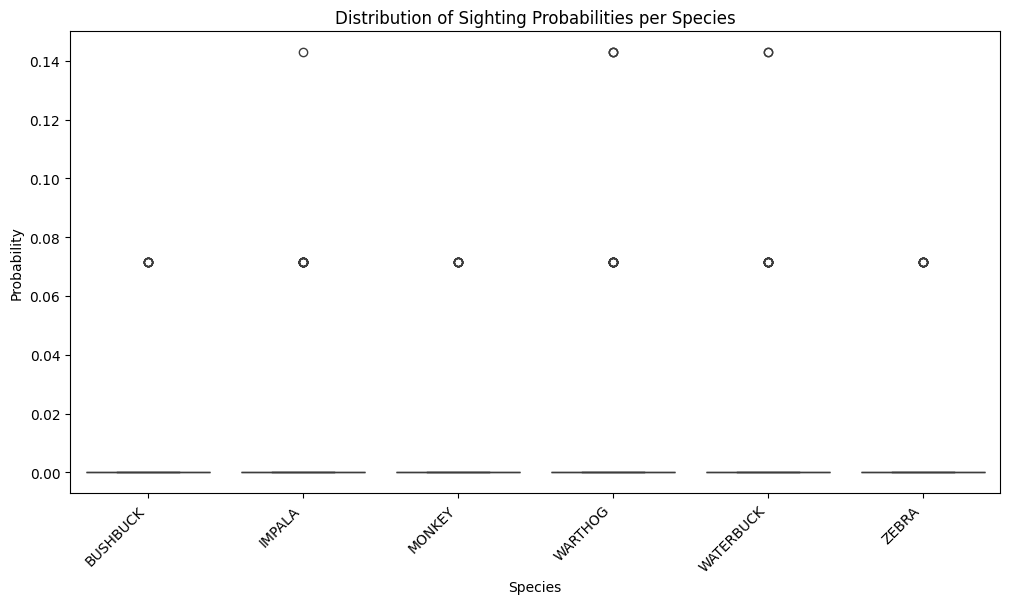

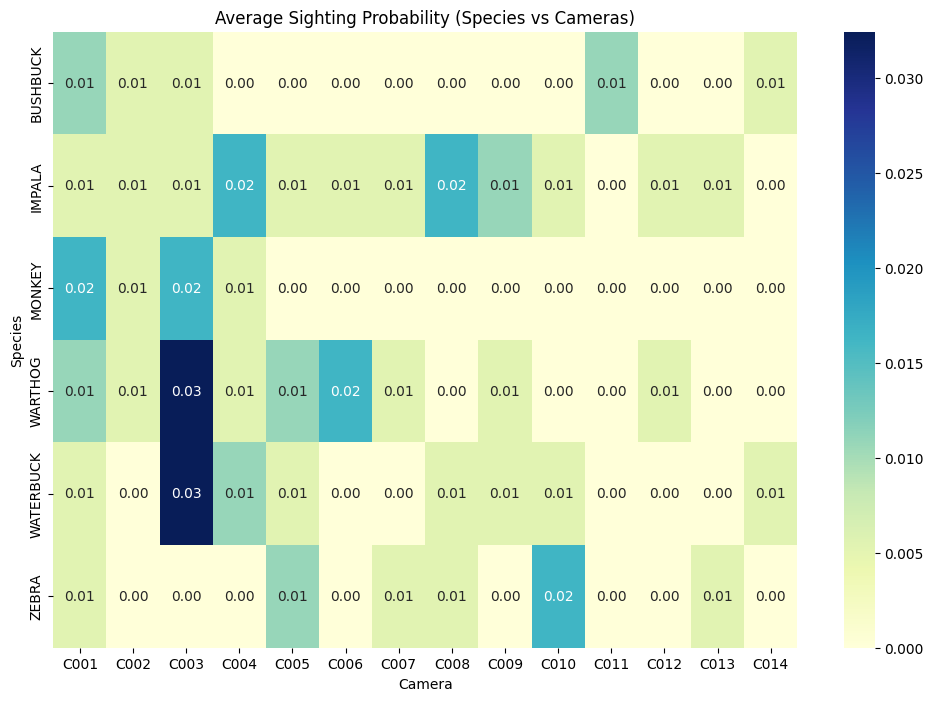

In [17]:
# Write your answer to Exercise 4 here

import matplotlib.pyplot as plt

if not isinstance(binary_df.index, (pd.DatetimeIndex, pd.PeriodIndex, pd.TimedeltaIndex)):
        binary_df = binary_df.copy()
        binary_df.index = pd.to_datetime(binary_df.index, errors="coerce")
binary_df = binary_df.sort_index()

# raw daily mean across all (camera, species)
avg_by_date_raw = binary_df.mean(axis=1)


# set and apply smooth frequency
smooth_freq = "ME" # Monthly average, "YE" would be yearly
avg_by_date_smooth = avg_by_date_raw.resample(smooth_freq).mean()

# plot raw + smoothed
plt.figure(figsize=(12, 5))
plt.plot(avg_by_date_raw.index, avg_by_date_raw.values, alpha=0.4, label="Daily (raw)")
plt.plot(avg_by_date_smooth.index, avg_by_date_smooth.values, linewidth=2, label=f"Smoothed (Monthly Average)")
plt.title("Average Sighting Probability Over Time")
plt.xlabel("Date"); plt.ylabel("Probability"); plt.legend()
plt.show()

#Print these commands to help you understand what they do
#print(binary_df.index)
#print(binary_df.mean(axis=0))
#print(binary_df.mean(axis=0).groupby(level=1).mean())

#TODO Plot species and camera averages
species_avg = binary_df.mean(axis=0).groupby(level=1).mean()
camera_avg = binary_df.mean(axis=0).groupby(level=0).mean()
plt.figure(figsize=(12, 5))
plt.plot(species_avg.index, species_avg.values, alpha=0.4, label="Species")
# --- Existing raw vs smoothed plot ---
plt.figure(figsize=(12, 5))
plt.plot(avg_by_date_raw.index, avg_by_date_raw.values, alpha=0.4, label="Daily (raw)")
plt.plot(avg_by_date_smooth.index, avg_by_date_smooth.values, linewidth=2, label=f"Smoothed (Monthly Average)")
plt.title("Average Sighting Probability Over Time")
plt.xlabel("Date"); plt.ylabel("Probability"); plt.legend()
plt.show()


# --- Species averages ---
species_avg = binary_df.mean(axis=0).groupby(level=1).mean()
plt.figure(figsize=(10, 5))
species_avg.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Average Sighting Probability per Species")
plt.ylabel("Probability")
plt.xticks(rotation=45, ha="right")
plt.show()


# --- Camera averages ---
camera_avg = binary_df.mean(axis=0).groupby(level=0).mean()
plt.figure(figsize=(10, 5))
camera_avg.sort_values(ascending=False).plot(kind="bar", color="salmon")
plt.title("Average Sighting Probability per Camera")
plt.ylabel("Probability")
plt.xticks(rotation=45, ha="right")
plt.show()


# --- Distribution across species (boxplot) ---
species_data = binary_df.groupby(level=1, axis=1).mean()
plt.figure(figsize=(12, 6))
sns.boxplot(data=species_data)
plt.title("Distribution of Sighting Probabilities per Species")
plt.ylabel("Probability")
plt.xticks(rotation=45, ha="right")
plt.show()


# --- Heatmap of camera × species ---
pivot = binary_df.mean(axis=0).unstack(level=0)  # species × camera
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average Sighting Probability (Species vs Cameras)")
plt.ylabel("Species")
plt.xlabel("Camera")
plt.show()




Exercise 3 extension: which of these relationships that you found are
statistically significant?

In [ ]:
# TODO Exercise 3 Extended


## Address: Naive Bayesian Prediction Model

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-naive-bayes.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-naive-bayes.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Using the data we collected in the Access stage and understood in
Assess, we can now Address our question, and create a naive Bayesian
classification model for predicting the probability of a camera sighting
a species on a given day.

$$
\text{P}(1 \mid c, s, d) = \frac{P(1) \cdot P(c \mid 1) \cdot P(s \mid 1) \cdot P(d \mid 1)}{P(c,s,d)}
$$

$$
\text{Using Bayes' rule:} \quad P(c \mid 1) = \frac{P(1 \mid c) \cdot P(c)}{P(1)} \quad \text{(and similarly for } s, d\text{)}
$$

$$
\Rightarrow \text{P}(1 \mid c, s, d) = \frac{P(1) \cdot \frac{P(1 \mid c) \cdot P(c)}{P(1)} \cdot \frac{P(1 \mid s) \cdot P(s)}{P(1)} \cdot \frac{P(1 \mid d) \cdot P(d)}{P(1)}}{P(c,s,d)}
$$

$$
= \frac{P(1 \mid c) \cdot P(1 \mid s) \cdot P(1 \mid d) \cdot P(c) \cdot P(s) \cdot P(d)}{P(1)^2 \cdot P(c,s,d)}
$$

$$
\text{Assuming independence:}
$$

$$
P(1 \mid c,s,d)=\frac{P(1 \mid c) \cdot P(1 \mid s) \cdot P(1 \mid d)}{P(1)^2}
$$

$$
\begin{align*}
&c = \text{camera ID (e.g., C001)} \\
&s = \text{species (e.g., IMPALA)} \\
&d = \text{smoothed date (e.g., month, or Gaussian-filtered day)}
\end{align*}
$$

### Exercise 5

Implement the model below.

In [19]:
from typing import Union
from datetime import date as DateType

def bayes_sighting_probability(df, camera, species, date) -> pd.DataFrame:
    """
    Removes a specific observation and estimates the probability of sighting
    a given species at a given camera on a specific date.

    Returns a DataFrame with intermediate probabilities and final estimate.
    """
    if isinstance(date, str) or isinstance(date, pd.Timestamp):
        date = pd.to_datetime(date).date()

    # remove the actual observation
    df_blind = df.copy()
    if (date in df_blind.index) and ((camera, species) in df_blind.columns):
        df_blind.loc[date, (camera, species)] = np.nan

    # Prior: overall probability species is seen anywhere
    P_species = df_blind.xs(species, level=1, axis=1).stack().mean()

    # Likelihood: probability species is seen at this camera
    if (camera, species) in df_blind.columns:
        P_species_given_camera = df_blind[(camera, species)].mean()
    else:
        P_species_given_camera = P_species

    # Evidence: probability of any sighting at this camera
    P_camera = df_blind.xs(camera, level=0, axis=1).stack().mean()

    # Bayes estimate
    numerator = P_species_given_camera * P_camera
    denominator = numerator + (1 - P_species_given_camera) * (1 - P_camera)

    if denominator == 0:
        estimated = float("nan")
    else:
        estimated = numerator / denominator

    # return as dataframe
    results = pd.DataFrame({
        "P_species": [P_species],
        "P_species_given_camera": [P_species_given_camera],
        "P_camera": [P_camera],
        "Estimated probability": [estimated]
    })

    return results


In [20]:
prob = bayes_sighting_probability(binary_df, "C006", "IMPALA", "2021-06-25")
prob


,P_species,P_species_given_camera,P_camera,Estimated probability
0,0.006564,0.005405,0.003604,0.00002


Well done! We should now have a working Access-Assess-Address data
science pipeline! Let’s see how it does.

In [ ]:
#

### Evaluation

The data is extremely sparse, with less than 1% of values being `1`.
This is a challenge, as checking naive accuracy would make always-zero a
very very good predictor.

Let’s evaluate our prediction system using `log-loss`
i.e. `cross-entropy`:

$$
\mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N}
\Big[
    y_i \, \log(\hat{p}_i) + (1 - y_i) \, \log(1 - \hat{p}_i)
\Big]
$$

### Exercise 6

Implement the loss function below.

In [23]:
# Write your answer to Exercise 6 here
def cross_entropy(y_true, y_pred, eps=1e-15):
    """
    Binary cross-entropy (log-loss).

    Parameters
    ----------
    y_true : list or array
        Ground-truth values (0 or 1).
    y_pred : list or array
        Predicted probabilities (between 0 and 1).
    eps : float
        Small constant to avoid log(0).

    Returns
    -------
    float
        The average cross-entropy loss.
    """
    y_true = np.array(y_true, dtype=float)
    y_pred = np.clip(np.array(y_pred, dtype=float), eps, 1 - eps)  # keep within (0,1)

    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return float(loss)


def evaluate_prediction_system(df, your_function, max_samples=1000):
    # Randomly sample up to 1000, if full evaluation taking too long
    np.random.seed(42)
    coords = [(date, camera, species) for date in df.index for (camera, species) in df.columns]
    if len(coords) > max_samples:
        idxs = np.random.choice(len(coords), size=max_samples, replace=False)
        coords = [coords[i] for i in idxs]

    y_true = []
    y_pred = []

    for date, camera, species in coords:
        value = df.loc[date, (camera, species)]
        y_true.append(value)
        prob = your_function(df, camera, species, date)  # should return scalar float
        y_pred.append(prob)

    return cross_entropy(y_true, y_pred)


# Example run
loss = evaluate_prediction_system(binary_df, bayes_sighting_probability)
print("Cross-entropy log-loss:", loss)


Cross-entropy log-loss: 0.1381551055796437


For reference, predicting a constant probability (eg. 0.5%) gives a loss
of around 0.026. This should be the benchmark number we want to improve
on. If your model does better than that, well done!

*Note: our approach included look-ahead bias - making predictions based
on data that we would not have access to at the time. For real-life
deployment, we would need to limit our training data to before
individual test cases.*

## Improving the Method: Correlated Variables

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-correlation-analysis-improvements.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-correlation-analysis-improvements.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The model above was quite simplified, and it disregarded any
correlations between the three variables. Since cameras are close to
each other, maybe they are more likely to capture the same animals on
the same day? Maybe some animals like or avoid some areas, or some other
animals? If any of the above is true, we can’t really be using simple
Bayes’ rule classification.

### Exercise 7

Analyse the data again to find the strongest relationships which can be
used to improve predictions. Plot correlation matrices and other helpful
charts.

Have a short read through the [DSAIL-Porini
paper](https://www.sciencedirect.com/science/article/pii/S2352340922010666)
for inspiration about other probability analyses that can be done here.

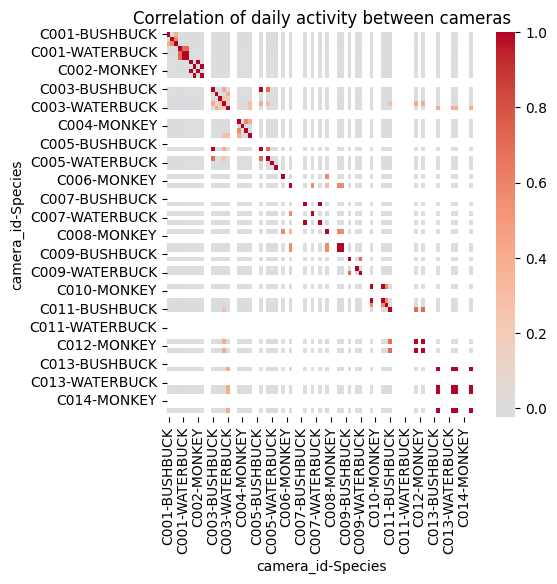

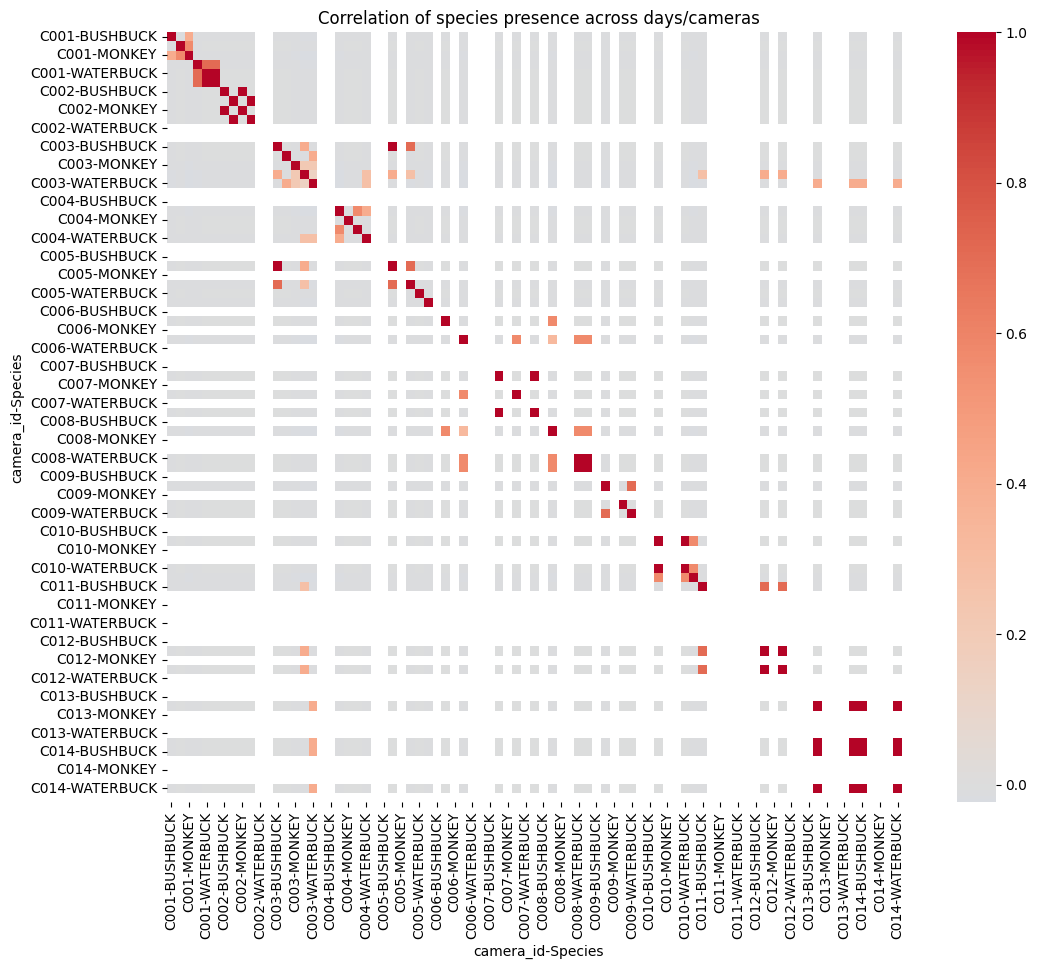

In [34]:
# Write your answer to Exercise 7 here
# Correlation between cameras accross
import seaborn as sns
# Average across species → how "busy" each camera is per day
camera_activity = binary_df.groupby("date").mean()
plt.figure(figsize=(5, 5))
sns.heatmap(camera_activity.corr(), cmap="coolwarm", center=0)
plt.title("Correlation of daily activity between cameras")
plt.show()
# correlation  between species
# Average across cameras → species activity per day
species_activity = binary_df.groupby("date").mean()

# If species are columns:
species_corr = binary_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(species_corr, cmap="coolwarm", center=0)
plt.title("Correlation of species presence across days/cameras")
plt.show()

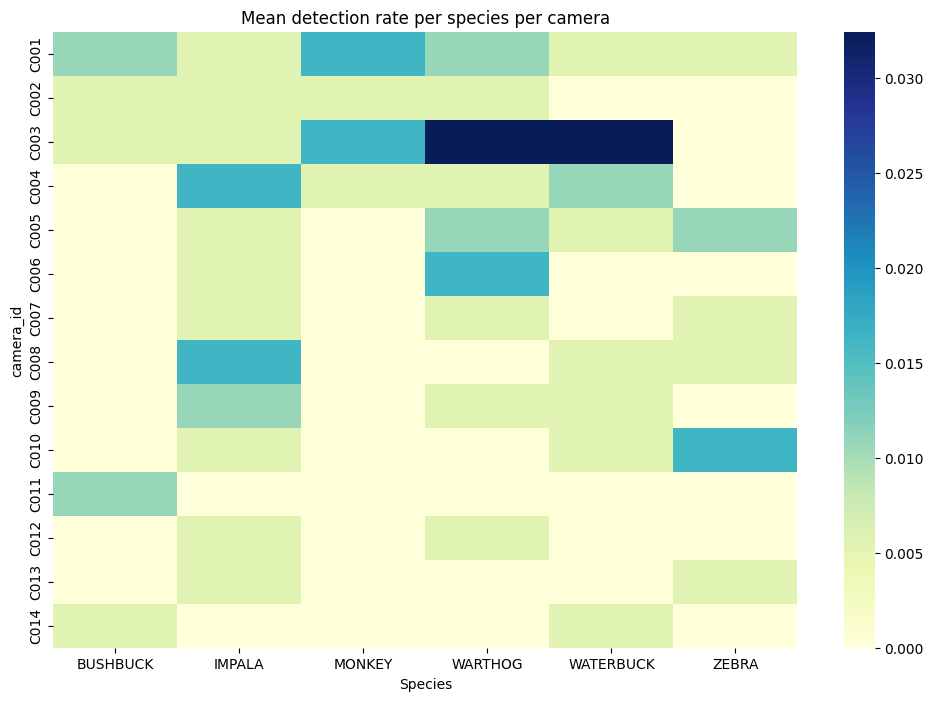

In [29]:
import numpy as np

species_camera = binary_df.mean()
species_camera = species_camera.unstack()  # reshape to [species x camera]

plt.figure(figsize=(12, 8))
sns.heatmap(species_camera, cmap="YlGnBu")
plt.title("Mean detection rate per species per camera")
plt.show()


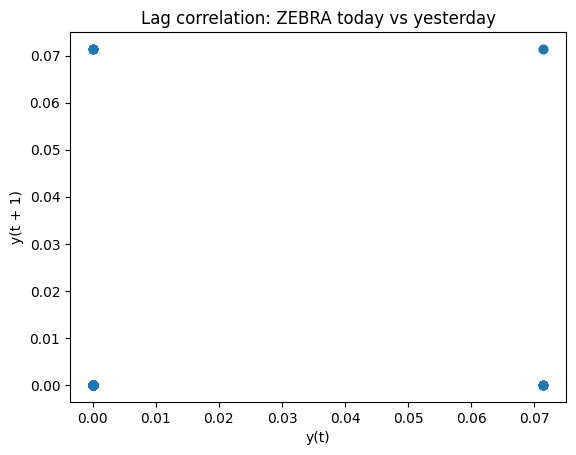

In [31]:
from pandas.plotting import lag_plot

# Example: lag plot for zebra activity
zebra = binary_df.xs("ZEBRA", level="Species", axis=1).mean(axis=1)
lag_plot(zebra, lag=1)
plt.title("Lag correlation: ZEBRA today vs yesterday")
plt.show()

/tmp/ipython-input-1123743780.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  species_df = binary_df.groupby(level="Species", axis=1).mean()


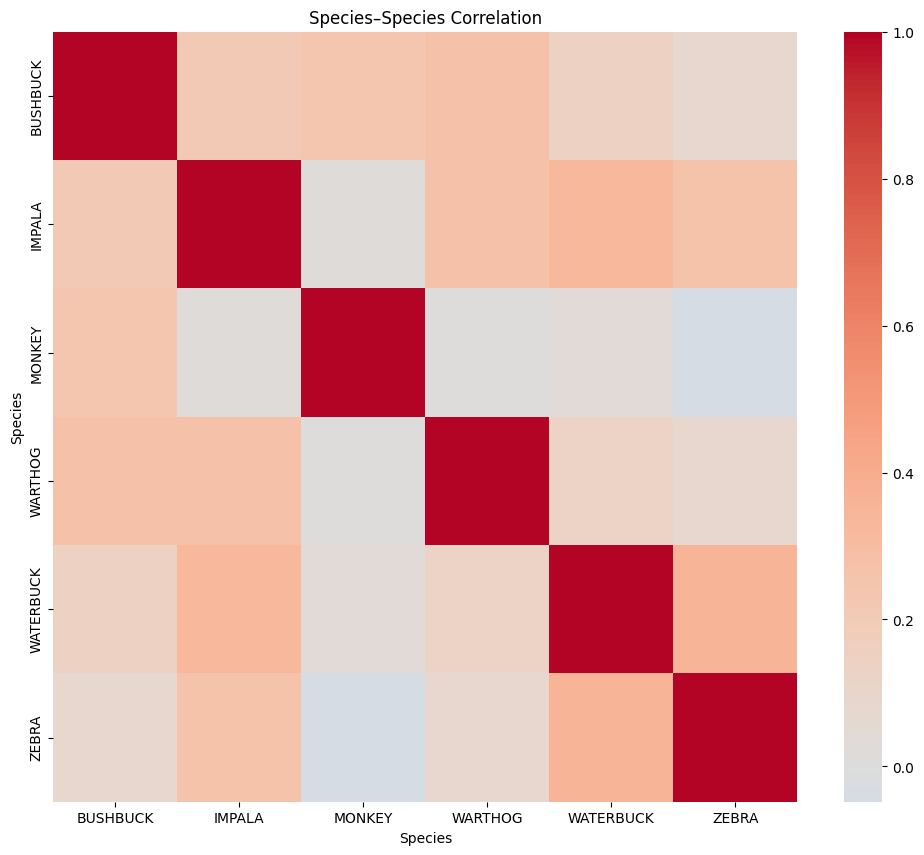

Top 10 strongest species–species correlations:
Species    Species  
WATERBUCK  ZEBRA        0.358608
IMPALA     WATERBUCK    0.332425
           WARTHOG      0.271410
BUSHBUCK   WARTHOG      0.271126
IMPALA     ZEBRA        0.259674
BUSHBUCK   MONKEY       0.236395
           IMPALA       0.217468
           WATERBUCK    0.137645
WARTHOG    WATERBUCK    0.135873
BUSHBUCK   ZEBRA        0.086841
dtype: float64


/tmp/ipython-input-1123743780.py:26: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  camera_df = binary_df.groupby(level="camera_id", axis=1).mean()


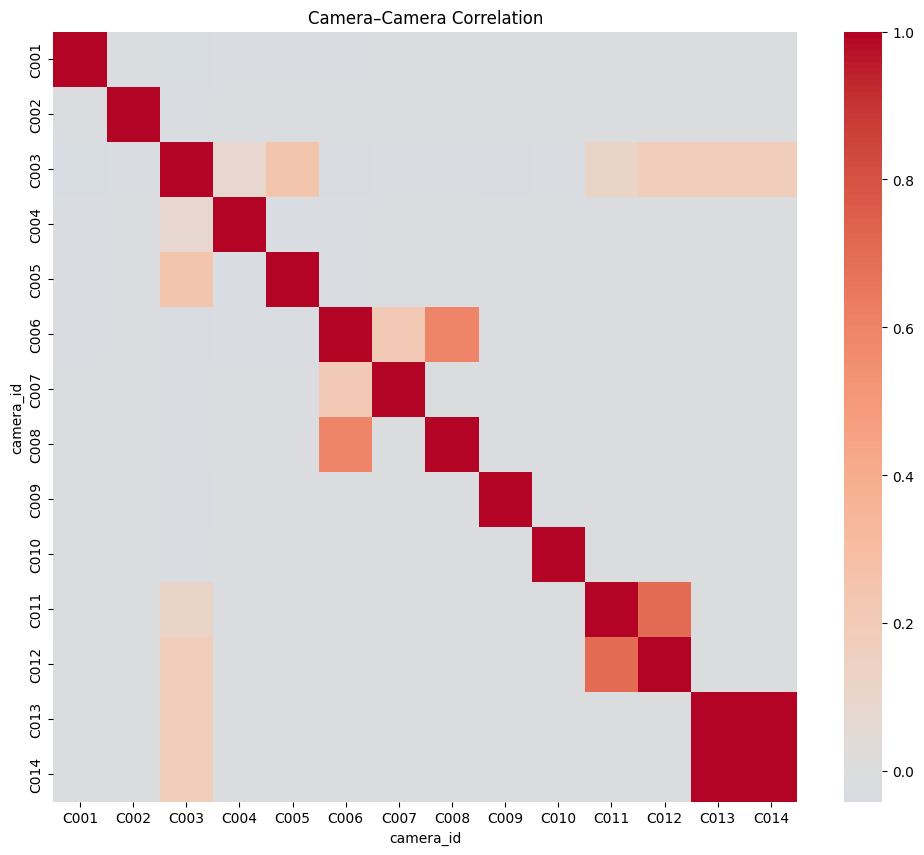

Top 10 strongest camera–camera correlations:
camera_id  camera_id
C013       C014         1.000000
C011       C012         0.705183
C006       C008         0.596850
C003       C005         0.244743
C006       C007         0.212436
C003       C012         0.180540
           C013         0.180540
           C014         0.180540
           C011         0.115056
           C004         0.082103
dtype: float64


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Species–Species Correlations ---
# Collapse over cameras: average activity per species per day
species_df = binary_df.groupby(level="Species", axis=1).mean()

species_corr = species_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(species_corr, cmap="coolwarm", center=0)
plt.title("Species–Species Correlation")
plt.show()

# Top-10 strongest correlations
species_corr_unstack = species_corr.unstack().dropna()
species_corr_unstack = species_corr_unstack[species_corr_unstack.index.get_level_values(0) < species_corr_unstack.index.get_level_values(1)]
top_species_corr = species_corr_unstack.abs().sort_values(ascending=False).head(10)
print("Top 10 strongest species–species correlations:")
print(species_corr_unstack.loc[top_species_corr.index].sort_values(ascending=False))


# --- 2. Camera–Camera Correlations ---
# Collapse over species: average activity per camera per day
camera_df = binary_df.groupby(level="camera_id", axis=1).mean()

camera_corr = camera_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(camera_corr, cmap="coolwarm", center=0)
plt.title("Camera–Camera Correlation")
plt.show()

# Top-10 strongest correlations
camera_corr_unstack = camera_corr.unstack().dropna()
camera_corr_unstack = camera_corr_unstack[camera_corr_unstack.index.get_level_values(0) < camera_corr_unstack.index.get_level_values(1)]
top_camera_corr = camera_corr_unstack.abs().sort_values(ascending=False).head(10)
print("Top 10 strongest camera–camera correlations:")
print(camera_corr_unstack.loc[top_camera_corr.index].sort_values(ascending=False))

Exercise Extension: Use what you found to improve your prediction model,
and compare it against the previous one.

In [42]:
def improved_sighting_probability(df, camera, species, date) -> float:
    if isinstance(date, str) or isinstance(date, pd.Timestamp):
        date = pd.to_datetime(date).date()

    # Blind the test point
    df_blind = df.copy()
    df_blind.loc[date, (camera, species)] = None

    # --- 1. Base probability ---
    base_prob = df_blind[(camera, species)].mean()

    # --- 2. Species correlations (group by species = level 1) ---
    species_df = df_blind.T.groupby(level=1).mean().T
    species_corr = species_df.corr()

    correlated_species = species_corr[species].dropna()
    correlated_species = correlated_species[correlated_species.index != species]

    species_signal = 0
    for sp, corr in correlated_species.items():
        if (camera, sp) in df_blind.columns:
            obs = df_blind.loc[date, (camera, sp)]
            if not pd.isna(obs):
                species_signal += corr * obs

    # --- 3. Camera correlations (group by camera = level 0) ---
    camera_df = df_blind.T.groupby(level=0).mean().T
    camera_corr = camera_df.corr()

    correlated_cameras = camera_corr[camera].dropna()
    correlated_cameras = correlated_cameras[correlated_cameras.index != camera]

    camera_signal = 0
    for cam, corr in correlated_cameras.items():
        if (cam, species) in df_blind.columns:
            obs = df_blind.loc[date, (cam, species)]
            if not pd.isna(obs):
                camera_signal += corr * obs

    # --- 4. Combine signals ---
    prob = base_prob + 0.5 * species_signal + 0.5 * camera_signal

    # Keep probability valid
    prob = np.clip(prob, 1e-6, 1 - 1e-6)

    return float(prob)


In [43]:
loss_old = evaluate_prediction_system(binary_df, bayes_sighting_probability)
loss_new = evaluate_prediction_system(binary_df, improved_sighting_probability)

print("Naive Bayes Log-Loss:", loss_old)
print("Improved Model Log-Loss:", loss_new)


Naive Bayes Log-Loss: 0.1381551055796437
Improved Model Log-Loss: 0.02402759646544135


## Extended Exercises

We didn’t use all of the available data when we just classified days as
“sighting” or “no sighting.” Extend your analysis to include all the
information in the file, like numbers of sightings, and numbers of
animals in the photos.

This will be quite challenging due to burst shots - assess the dataset
and come up with a good definition of what a burst is, and a data
structure that has the information you chose as important.

Example burst data: - Camera, Date, Species - Time Start, Time End -
Number of photos - Average/most animals in a photo

*Particular challenge around deduplicating multi-species sightings.*

### Exercise 8

Use this additional data and repeat the analysis you did above. Aim to
further improve predictions and write a new function like
`burst_sighting_probability('C001', 'IMPALA', '2021-12-24')`.

In [ ]:
# Write your answer to Exercise 8 here






### Exercise 9

Compare the results and note the improvement (or lack thereof) against
the two previous prediction functions you created.

In [ ]:
# Write your answer to Exercise 9 here






### Exercise 10

What other benefits does your new system provide? Can you modify it to
provide more predictions, like expected number of sightings, number of
animals?

In [ ]:
# Write your answer to Exercise 10 here






## Database Integration with SQLite

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-sqlite-database-creation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-sqlite-database-creation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Throughout the course you will work with various datasets and data
formats. An SQL database is one of the most common ways to store large
amounts of data. We recognise that many of you may be familiar with this
already, but let’s use this example to build a small toy database of
animal sightings based on the excel file and the dataframes we created.

### Exercise 11

-   Create a local database (eg. `sqlite3`).
-   Add a table with animal sighting data.
-   Add a table with camera coordinates data.
-   Set indices on columns you might search by (eg. `CameraID`, `Date`).
    Make sure the index types make sense!
-   Look into multi column indices, and set one on `Latitude` and
    `Longitude`.
-   Demonstrate success with a couple SQL queries, eg. counting `IMPALA`
    sightings within a `200m` square around `-0.3866, 36.9649`.

Helpful links:

[SQL Intro, Creating Tables, Indices,
Joins](https://www.w3schools.com/sql/sql_intro.asp)

[Multi-Column
Indices](https://stackoverflow.com/questions/179085/multiple-indexes-vs-multi-column-indexes)

Remember to include reusable code from this and previous exercises in
your Fynesse library!

In [ ]:
# Write your answer to Exercise 11 here






## Extended Analysis: Burst Detection

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-burst-detection-analysis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-burst-detection-analysis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We didn’t use all of the available data when we just classified days as
“sighting” or “no sighting.” Camera traps often capture “burst”
sequences - multiple photos taken in rapid succession when motion is
detected. Understanding and properly handling these bursts can provide
richer information about animal behavior.

This extended analysis is quite challenging due to the complexity of
burst detection and multi-species deduplication.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [ ]:
# Define what constitutes a "burst"
def detect_bursts(df, time_threshold_minutes=5, min_photos=2):
    """
    Detect photo bursts in camera trap data

    Parameters:
        df: DataFrame with timestamp and camera_id columns
        time_threshold_minutes: Photos within this time are considered same burst
        min_photos: Minimum photos to constitute a burst

    Returns:
        DataFrame with burst information
    """
    bursts = []

    # Group by camera and species
    for (camera, species), group in df.groupby(['camera_id', 'Species']):
        # Sort by timestamp
        group_sorted = group.dropna(subset=['timestamp']).sort_values('timestamp')

        if len(group_sorted) < min_photos:
            continue

        # Identify bursts using time gaps
        time_diffs = group_sorted['timestamp'].diff()
        burst_breaks = time_diffs > pd.Timedelta(minutes=time_threshold_minutes)
        burst_ids = burst_breaks.cumsum()

        # Process each burst
        for burst_id, burst_group in group_sorted.groupby(burst_ids):
            if len(burst_group) >= min_photos:
                burst_info = {
                    'camera_id': camera,
                    'species': species,
                    'burst_start': burst_group['timestamp'].min(),
                    'burst_end': burst_group['timestamp'].max(),
                    'duration_seconds': (burst_group['timestamp'].max() -
                                       burst_group['timestamp'].min()).total_seconds(),
                    'num_photos': len(burst_group),
                    'date': burst_group['timestamp'].min().date()
                }
                bursts.append(burst_info)

    return pd.DataFrame(bursts)

# Apply burst detection to our data (if we have timestamp data)
if 'df' in locals() and 'timestamp' in df.columns:
    burst_data = detect_bursts(df)

    print(f"Detected {len(burst_data)} bursts")
    if len(burst_data) > 0:
        print("\nBurst statistics:")
        print(f"  Average photos per burst: {burst_data['num_photos'].mean():.1f}")
        print(f"  Average burst duration: {burst_data['duration_seconds'].mean():.1f} seconds")
        print(f"  Longest burst: {burst_data['num_photos'].max()} photos")

        # Show burst distribution by species
        burst_by_species = burst_data.groupby('species').agg({
            'num_photos': ['count', 'mean'],
            'duration_seconds': 'mean'
        }).round(2)
        burst_by_species.columns = ['Total_Bursts', 'Avg_Photos_per_Burst', 'Avg_Duration_Seconds']
        print("\nBurst patterns by species:")
        print(burst_by_species)
else:
    print("Timestamp data not available for burst analysis")

In [ ]:
# Advanced analysis: Multi-species burst handling
def analyze_multispecies_interactions(burst_data, time_window_minutes=10):
    """
    Analyze cases where multiple species appear in close temporal/spatial proximity
    """
    if len(burst_data) == 0:
        return pd.DataFrame()

    interactions = []

    # Group bursts by camera and date
    for (camera, date), day_bursts in burst_data.groupby(['camera_id', 'date']):
        day_bursts_sorted = day_bursts.sort_values('burst_start')

        # Look for overlapping or closely timed bursts of different species
        for i in range(len(day_bursts_sorted)):
            burst1 = day_bursts_sorted.iloc[i]

            for j in range(i+1, len(day_bursts_sorted)):
                burst2 = day_bursts_sorted.iloc[j]

                # Check if bursts are close in time
                time_gap = (burst2['burst_start'] - burst1['burst_end']).total_seconds()

                if time_gap <= time_window_minutes * 60 and burst1['species'] != burst2['species']:
                    interaction = {
                        'camera_id': camera,
                        'date': date,
                        'species_1': burst1['species'],
                        'species_2': burst2['species'],
                        'time_gap_seconds': time_gap,
                        'interaction_type': 'sequential' if time_gap > 0 else 'overlapping'
                    }
                    interactions.append(interaction)

    return pd.DataFrame(interactions)

# Analyze species interactions
if 'burst_data' in locals() and len(burst_data) > 0:
    interactions = analyze_multispecies_interactions(burst_data)

    if len(interactions) > 0:
        print(f"\nFound {len(interactions)} potential species interactions")

        # Most common species pairs
        species_pairs = interactions.groupby(['species_1', 'species_2']).size().sort_values(ascending=False)
        print("\nMost frequent species interactions:")
        print(species_pairs.head())

        # Temporal patterns
        avg_gap = interactions['time_gap_seconds'].mean()
        print(f"\nAverage time gap between species: {avg_gap:.1f} seconds")
    else:
        print("\nNo close species interactions detected")
else:
    print("Burst data not available for interaction analysis")

This extended analysis demonstrates how camera trap data can be mined
for complex ecological insights. Burst patterns can reveal:

-   **Feeding behavior**: Long bursts might indicate feeding sites
-   **Group dynamics**: Multiple animals in quick succession
-   **Species interactions**: Temporal associations between different
    species
-   **Individual identification**: Consistent burst patterns might help
    identify individuals

The challenge lies in balancing detail with computational complexity,
and in handling the inherent uncertainty in automated image analysis.

End of Practical 3

     _______  __   __  _______  __    _  ___   _  _______  __
    |       ||  | |  ||   _   ||  |  | ||   | | ||       ||  |
    |_     _||  |_|  ||  |_|  ||   |_| ||   |_| ||  _____||  |
      |   |  |       ||       ||       ||      _|| |_____ |  |
      |   |  |       ||       ||  _    ||     |_ |_____  ||__|
      |   |  |   _   ||   _   || | |   ||    _  | _____| | __
      |___|  |__| |__||__| |__||_|  |__||___| |_||_______||__|

::: {.cell .markdown}

## References